In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from astropy import units as u
from astropy import constants as const
from astropy.table import Table, join
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.io.ascii as asciitable
from astropy.io import ascii
import astropy.units as au

import warnings
warnings.filterwarnings('ignore')


In [12]:
#Retreiving data for UPDATED Milky Way CMZ

cmz_clouds_starFormationRate = Table.read('sfr_table.tex').to_pandas()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate['Best SFR Estimate']
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=0, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)
droplist= cmz_clouds_starFormationRate.index[cmz_clouds_starFormationRate == '-'].tolist()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
#cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)


cmz_clouds_kinematic = Table.read('cmz_cloud_kinematic_properties.tex').to_pandas()
cmz_clouds_kinematic = cmz_clouds_kinematic['HCN mom0']
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=0, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)
#droplist= cmz_clouds_kinematic.index[cmz_clouds_kinematic == '-'].tolist()
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=droplist, axis=0)
#cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=droplist, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)


cmz_clouds_physical = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_physical = cmz_clouds_physical['Area']
cmz_clouds_physical = cmz_clouds_physical.drop(labels=0, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)
cmz_clouds_physical = cmz_clouds_physical.drop(labels=droplist, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)

cmz_clouds_mass = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_mass = cmz_clouds_mass['Mass']
cmz_clouds_mass = cmz_clouds_mass.drop(labels=0, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)
cmz_clouds_mass = cmz_clouds_mass.drop(labels=droplist, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)

area=(cmz_clouds_physical.values.astype(float)).tolist()
SFR= (cmz_clouds_starFormationRate.values.astype(float)).tolist()
mass=(cmz_clouds_mass.values.astype(float)).tolist()


mass_list=[]
for i in range(len(cmz_clouds_starFormationRate)):
    mass_list.append(mass[i])
    
SFR_list=[]
for i in range(len(cmz_clouds_starFormationRate)):
    SFR_list.append(SFR[i])


In [138]:
#Retreiving data for OLD Milky Way CMZ
cmz_clouds_kinematic = Table.read('cmz_cloud_kinematic_properties.tex').to_pandas()
cmz_clouds_kinematic = cmz_clouds_kinematic['HCN mom0']
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=0, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)
droplist= cmz_clouds_kinematic.index[cmz_clouds_kinematic == '-'].tolist()
cmz_clouds_kinematic = cmz_clouds_kinematic.drop(labels=droplist, axis=0)
cmz_clouds_kinematic = cmz_clouds_kinematic.reset_index(drop=True)

cmz_clouds_starFormationRate = Table.read('cmz_cloud_SFR_properties.tex').to_pandas()
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate['SFR']
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=0, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.drop(labels=droplist, axis=0)
cmz_clouds_starFormationRate = cmz_clouds_starFormationRate.reset_index(drop=True)

cmz_clouds_physical = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_physical = cmz_clouds_physical['Area']
cmz_clouds_physical = cmz_clouds_physical.drop(labels=0, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)
cmz_clouds_physical = cmz_clouds_physical.drop(labels=droplist, axis=0)
cmz_clouds_physical = cmz_clouds_physical.reset_index(drop=True)

cmz_clouds_mass = Table.read('cmz_cloud_physical_properties.tex').to_pandas()
cmz_clouds_mass = cmz_clouds_mass['Mass']
cmz_clouds_mass = cmz_clouds_mass.drop(labels=0, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)
cmz_clouds_mass = cmz_clouds_mass.drop(labels=droplist, axis=0)
cmz_clouds_mass = cmz_clouds_mass.reset_index(drop=True)

area=(cmz_clouds_physical.values.astype(float)).tolist()
SFR= (cmz_clouds_starFormationRate.values.astype(float)).tolist()
mass=(cmz_clouds_mass.values.astype(float)).tolist()


mass_list=[]
for i in range(len(cmz_clouds_starFormationRate)):
    mass_list.append(mass[i])
    
SFR_list=[]
for i in range(len(cmz_clouds_starFormationRate)):
    SFR_list.append(SFR[i])


In [13]:
#Used in literature properties 
def get_cmap(n, name='jet'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def get_HCNIR(HCN):
    """Jim ́enez-Donaire et al. Table 5"""
    IR = np.log10(10**2.89 * 10**HCN)
    return(IR)

def get_MdenseSFR(Mdense):
    """Lada"""
    SFR = 4.6e-8*Mdense
    return(SFR)

def get_Mdense(HCN, alphaHCN=10):
    """HCN in log - alpha = 10 Gao+Solomon"""
    Mdense = alphaHCN * (10**HCN)
    return(Mdense *au.Msun)

def get_SFR(IR):
    """HCN in log - 3.88 × 10−44 L(TIR) Murphy et al. (2011)"""
    conv = (3.88e-44*au.s/au.erg).to(1/au.Lsun).value


    SFR = conv * (10**IR)
    return(SFR *au.Msun/au.yr)

In [14]:
"""literature properties"""

table = Table.read('./data/galaxies_MJD.csv')
table['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table['logLHCN'], 5) 
table.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table['logLIR']) 
table.add_column(SFR, name='SFR') 

table_WMc = Table.read('./data/clouds_MJD.csv')
table_WMc['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_WMc['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_WMc['logLHCN'], 5) 
table_WMc.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_WMc['logLIR']) 
table_WMc.add_column(SFR, name='SFR') 

table_E = Table.read('./data/empirecents_MJD.csv')
table_E['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_E['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_E['logLHCN'], 5) 
table_E.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_E['logLIR']) 
table_E.add_column(SFR, name='SFR')

table_E = Table.read('./data/empirecents_MJD.csv')
table_E['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_E['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_E['logLHCN'], 5) 
table_E.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_E['logLIR']) 
table_E.add_column(SFR, name='SFR')

table_MW = Table.read('./data/MWCMZ_MJD.csv')
table_MW['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_MW['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_MW['logLHCN'], 5) 
table_MW.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_MW['logLIR']) 
table_MW.add_column(SFR, name='SFR')

table_cl = Table.read('./data/clouds_lada.csv')
table_cl['Mdense'].units = au.Msun
table_cl['SFR'].units = au.Msun/au.yr

table_MWevo = Table.read('./data/MWCMZevo_KK.csv')
table_MWevo['Sigma_mol'].unit = Mdense.unit * au.pc**-2
table_MWevo['Sigma_SFR'].unit = SFR.unit * au.pc**-2

Mdense = table_MWevo['Sigma_mol'] * 500*au.pc * 100*au.pc
SFR = table_MWevo['Sigma_SFR'] * 500*au.pc * 100*au.pc
table_MWevo.add_column(Mdense, name='Mdense') 
table_MWevo.add_column(SFR, name='SFR')

table_ce = Table.read('./data/clouds_evans.csv')
table_ce['Mdense'].unit = au.Msun
table_ce['SFR'].unit = au.Msun/au.yr

table_cvt1 = Table.read('./data/clouds_V16_t1.fits')
table_cvt2 = Table.read('./data/clouds_V16_t2.fits')
table_cvt1['MCloud'].unit = au.Msun * 1e3
table_cvt1['SFR-Rad'].unit = au.Msun / au.Myr
table_cvt1['SFR-MIR'].unit = au.Msun / au.Myr

table_cv = join(table_cvt1, table_cvt2, join_type='outer')
ids = table_cv['Mdense']/table_cv['e_Mdense'] > 3

In [15]:
"""MALATANG properties - https://arxiv.org/pdf/2003.06595.pdf"""

sfr_ngc253 = np.log10(2522e-3)
gas_ngc253 = np.log10(154.6e6)

"""NGC3627 properties - https://academic.oup.com/mnras/article-abstract/506/1/963/6311820?redirectedFrom=fulltext"""

sfr_ngc3627 = np.log10(0.038924883)
gas_ngc3627 = np.log10(18505825/2)

"""M51 properties - https://www.aanda.org/articles/aa/pdf/2019/05/aa34915-18.pdf"""

arr = np.array([[5.97e+4, 5.32e+7],
                [9.24e+4, 5.58e+7],
                [9.61e+4, 5.85e+7],
                [1.49e+5, 5.86e+7],
                [8.88e+4, 3.83e+7],
                [5.97e+4, 3.65e+7],
                [5.97e+4, 1.98e+7],
                [5.97e+4, 1.43e+7]])

sfr1_m51 = np.log10(arr[:,1])
gas1_m51 = np.log10(arr[:,0])

sfr_m51 = np.log10(get_SFR(sfr1_m51).value)
gas_m51 = np.log10(get_Mdense(gas1_m51, 5).value)

gas_m51, sfr_m51

(array([5.47494434, 5.66464198, 5.68169339, 5.87215627, 5.64738297,
        5.47494434, 5.47494434, 5.47494434]),
 array([-2.10228471, -2.08156215, -2.06104048, -2.06029873, -2.24499757,
        -2.26590348, -2.53153116, -2.67286031]))

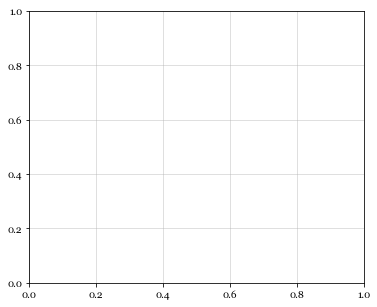

In [16]:
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.5)


In [17]:
"""literature properties - Milky Way Clouds"""

#creating the "density" effect on graph
x = np.log10(np.hstack([table_cl['Mdense'],table_ce['Mdense']]))
y = np.log10(np.hstack([table_cl['SFR'],table_ce['SFR']]))

ax.scatter(x, y, ec='none', fc='black', s=43)
ax.scatter(x, y, ec='none', fc='white', s=30)

#plotting points
ax.scatter(x, y, s=30, ec='none', c='red',alpha=0.4,label="Milky Way Clouds")

#creating the "density" effect on graph
table_WMc['Mdense'] = np.log10(table_WMc['Mdense'])
table_WMc['SFR'] = np.log10(table_WMc['SFR'])

refs = list(np.unique(table_WMc['Ref']))

for i, ref in enumerate(refs):
    
    ids = np.where(table_WMc['Ref']==ref)
    x = table_WMc['Mdense'][ids]
    y = table_WMc['SFR'][ids]
    ax.scatter(x, y, ec='none', fc='black', s=43)
    
for i, ref in enumerate(refs):
    
    ids = np.where(table_WMc['Ref']==ref)
    x = table_WMc['Mdense'][ids]
    y = table_WMc['SFR'][ids]

    ax.scatter(x, y, ec='none', fc='white', s=30)

#plotting points
for i, ref in enumerate(refs):
    
    ids = np.where(table_WMc['Ref']==ref)
    x = table_WMc['Mdense'][ids]
    y = table_WMc['SFR'][ids]
    ax.scatter(x, y, s=30, ec='none',alpha=0.4, c='red')

In [18]:
"""Extragalatic"""
refs = list(np.unique(table_WMc['Ref']))

table['Mdense'] = np.log10(table['Mdense'])
table['SFR'] = np.log10(table['SFR'])

refs = list(np.unique(table['Ref']))
refs.remove('Gallagher18')

#creating the "density" effect on graph
for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, ec='none', fc='black', s=43)

for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, ec='none', fc='white', s=30)

#plotting points
for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    if ref in ['Bigiel15']: 
        ax.scatter(x, y, s=30,ec='none', c='orange',alpha=0.4, label="Disc Galaxies")
    if ref in ['Gao04', 'Usero15', 'Kepley14', 'Crocker']: 
        ax.scatter(x, y, s=30, ec='none',alpha=0.4, c='orange')

    if ref in ['Gao07']: 
        ax.scatter(x, y, s=30, c='#bb6Eff',ec='none',alpha=0.4,label="High-redshift Galaxies")
    
    if ref in ['Krips08']: 
        ax.scatter(x, y, s=30,c='blue', ec='none',alpha=0.4,label= "Starburst Galaxies")
    if ref in ['Garcia-Burillo12', 'Gracia-Carpio08', 'Juneau09', 'Privon15']: 
        ax.scatter(x, y, s=30, c='blue',alpha=0.4, ec="none")


#creating the "density" effect on graph for Milky Way CMZ and Extragalactic CMZs
mass_list = np.array(np.hstack([np.log10(mass_list), gas_ngc253,gas_ngc3627, gas_m51]))

SFR_list = np.array(np.hstack([np.log10(SFR_list),sfr_ngc253, sfr_ngc3627,sfr_m51]))

ax.scatter(mass_list, SFR_list, ec='none', fc='black', s=43)
ax.scatter(mass_list, SFR_list, ec='none', fc='white', s=30)

#plotting points
ax.scatter(mass_list, SFR_list, c='c', alpha=0.4, s=30, ec='none', label="Milky Way CMZ")

In [19]:
"""Literatur properties CMZs"""
#plotting points
ref = 'Gallagher18'
ids = np.where(table['Ref']==ref)
x = table['Mdense'][ids]
y = table['SFR'][ids]

ax.scatter(x, y, c='#ff00f8', ec='none',alpha=0.5, s=30)

table_E['Mdense'] = np.log10(table_E['Mdense'])
table_E['SFR'] = np.log10(table_E['SFR'])

ax.scatter(table_E['Mdense'], table_E['SFR'], c='#ff00f8', ec='none',alpha=0.5, s=30,label="Extragalactic CMZs")


ax.scatter(gas_ngc253, sfr_ngc253, c='#ff00f8',ec='none',alpha=0.5, s=30)
ax.scatter(gas_ngc3627, sfr_ngc3627, c='#ff00f8',ec='none',alpha=0.5, s=30)
ax.scatter(gas_m51, sfr_m51, c='#ff00f8',ec='none',alpha=0.5, s=30)

In [20]:
"""CMZ properties"""
#error bar
sfr_CMZ_L = np.log10(0.012)
gas_CMZ_L = np.log10(1.8e7)

sfr_CMZ_H = np.log10(0.14)
gas_CMZ_H = np.log10(5.3e7)


x = np.mean([gas_CMZ_L, gas_CMZ_H])
y = np.mean([sfr_CMZ_L, sfr_CMZ_H])
xerr = (gas_CMZ_H-x)
yerr = (sfr_CMZ_H-y)

ax.errorbar([x],[y],xerr=xerr,yerr=yerr,
            zorder=11, c='black', 
            capsize=3, 
            elinewidth=2,
            capthick=2)

ax.scatter(x,y, fc="c",ec='black', lw=2, zorder=11)



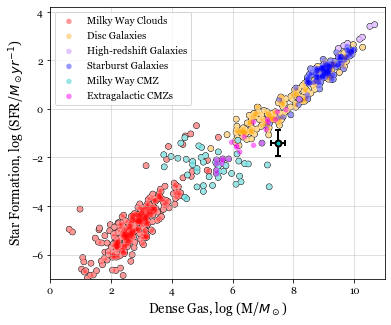

In [21]:

ax.set_ylabel('Star Formation, log (SFR/$M_\odot$$yr^{-1}$)', **{'fontname':'Georgia'}, fontsize=13)
ax.set_xlabel('Dense Gas, log (M/$M_\odot$)',**{'fontname':'Georgia'},fontsize=13)
mpl.rc('font', family='Georgia')
ax.set_xlim([0, 11])
ax.set_ylim([-7, 4.2])
ax.legend()
fig

In [606]:
fig.savefig('SFRvsDenseGas.pdf')